In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("/content/student_scores.csv")

In [3]:
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,NaN,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
data.isna().sum()

,0
Hours,3
Scores,0


In [7]:
data.dropna(subset=['Hours'], inplace=True)

In [8]:
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25
10,7.7,85


In [10]:
y=data["Scores"]

In [9]:
X = data[['Hours']]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44, shuffle =True)

In [12]:
model =LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [13]:
y_pred=model.predict(X_test)

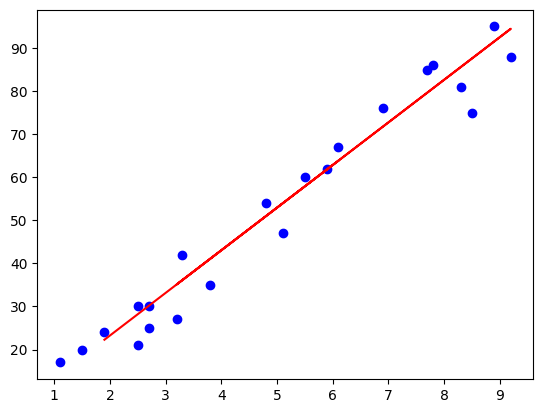

In [14]:
plt.scatter(X,y, color='blue',label='Data Points')
plt.plot(X_test,y_pred,color='red',label='reg')
plt.show()

In [18]:
print(f"Length of y: {len(y)}")
print(f"Length of y_pred: {len(y_pred)}")

Length of y: 22
Length of y_pred: 5


In [19]:
print(f"Shape of X used for prediction: {X.shape}")


Shape of X used for prediction: (22, 1)


In [20]:
# Debug the input data
print(f"Shape of X: {X.shape}")
print(f"Length of y: {len(y)}")

# Generate predictions
y_pred = model.predict(X)
print(f"Shape of y_pred: {y_pred.shape}")

# Ensure lengths match
if len(y_pred) != len(y):
    print("Mismatch between y and y_pred lengths!")
    print(f"Length of y: {len(y)}, Length of y_pred: {len(y_pred)}")
else:
    print("Lengths are consistent. Proceeding with evaluation.")


Shape of X: (22, 1)
Length of y: 22
Shape of y_pred: (22,)
Lengths are consistent. Proceeding with evaluation.


In [21]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate metrics
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Print results
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 27.85042550115489
R^2 Score: 0.9576231622515743


In [22]:
# function to test the model
def predict_salary(years_experience):
    predicted_salary = model.predict(X_test)
    return predicted_salary[0]


print(predict_salary(4))

63.81527949793407


In [34]:
poly = PolynomialFeatures(degree=6)
X_poly = poly.fit_transform(X)

In [35]:
# Fit the model
model = LinearRegression()
model.fit(X_poly, y)

LinearRegression()

In [36]:
y_pred = model.predict(X_poly)

In [37]:

# Evaluate the model
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 19.75976774535797
R^2 Score: 0.9699337996952009


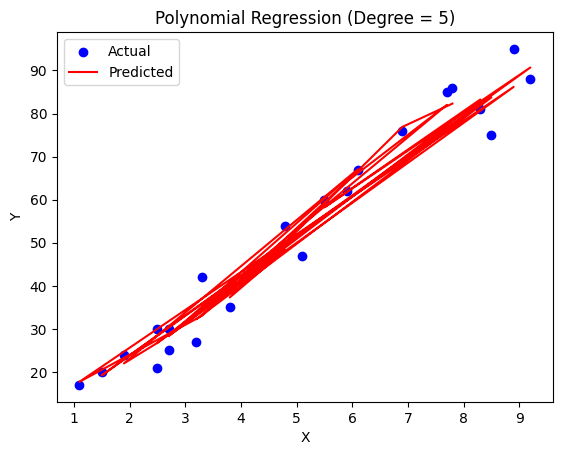

In [38]:
# Visualize the results
plt.scatter(X, y, color='blue', label="Actual")
plt.plot(X, y_pred, color='red', label="Predicted")
plt.title("Polynomial Regression (Degree = 5)")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()